In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib



from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
#     "oracle.run1.framed-cores_wisig",
    "cores_wisig-oracle.run1.framed",
]

experiments = {}

for experiment in experiments_to_get:
    print(experiment)
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "tl_3/A_killme", experiment)
    )

cores_wisig-oracle.run1.framed


In [3]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "target_val_label_accuracy",
    "x_transform",
])

# x_transform_mapping = {
#     tuple(["unit_power"]):"Unit Power",
#     tuple(["unit_mag"]): "Unit Magnitude",
#     tuple([]): "None"
# }

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
       
        datasets = trial["parameters"]["datasets"]

        x_transforms = set()
        for ds in datasets:
            trans = str(ds["x_transforms"])
            if "unit_mag" in trans: x_transforms.add("unit_mag")
            if "unit_power" in trans: x_transforms.add("unit_power")
                
            if "unit_mag" not in trans and "unit_power" not in trans:
                x_transforms.add("none")
        assert len(x_transforms) == 1
            
#         transforms = list(set( ( tuple() for d in datasets) ))

#         assert len(transforms) == 1
        
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["x_transform"] =  x_transforms.pop()
#         f["x_transform"] = "A"
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,target_val_label_accuracy,x_transform
0,cores_wisig-oracle.run1.framed,0.941032,0.218262,unit_power
1,cores_wisig-oracle.run1.framed,0.945447,0.233268,unit_mag
2,cores_wisig-oracle.run1.framed,0.957796,0.191374,unit_power
3,cores_wisig-oracle.run1.framed,0.977419,0.493262,none
4,cores_wisig-oracle.run1.framed,0.957386,0.186979,unit_power
5,cores_wisig-oracle.run1.framed,0.978147,0.286458,none
6,cores_wisig-oracle.run1.framed,0.968964,0.181087,unit_mag
7,cores_wisig-oracle.run1.framed,0.972793,0.212467,unit_mag
8,cores_wisig-oracle.run1.framed,0.979811,0.364160,none
9,cores_wisig-oracle.run1.framed,0.968857,0.208887,unit_mag


In [4]:
m = pd.melt(all_trials, 
        id_vars=["experiment_name", "x_transform"], 
        value_vars=[
            "source_val_label_accuracy",
            "target_val_label_accuracy",
        ])
m

,experiment_name,x_transform,variable,value
0,cores_wisig-oracle.run1.framed,unit_power,source_val_label_accuracy,0.941032
1,cores_wisig-oracle.run1.framed,unit_mag,source_val_label_accuracy,0.945447
2,cores_wisig-oracle.run1.framed,unit_power,source_val_label_accuracy,0.957796
3,cores_wisig-oracle.run1.framed,none,source_val_label_accuracy,0.977419
4,cores_wisig-oracle.run1.framed,unit_power,source_val_label_accuracy,0.957386
5,cores_wisig-oracle.run1.framed,none,source_val_label_accuracy,0.978147
6,cores_wisig-oracle.run1.framed,unit_mag,source_val_label_accuracy,0.968964
7,cores_wisig-oracle.run1.framed,unit_mag,source_val_label_accuracy,0.972793
8,cores_wisig-oracle.run1.framed,none,source_val_label_accuracy,0.979811
9,cores_wisig-oracle.run1.framed,unit_mag,source_val_label_accuracy,0.968857


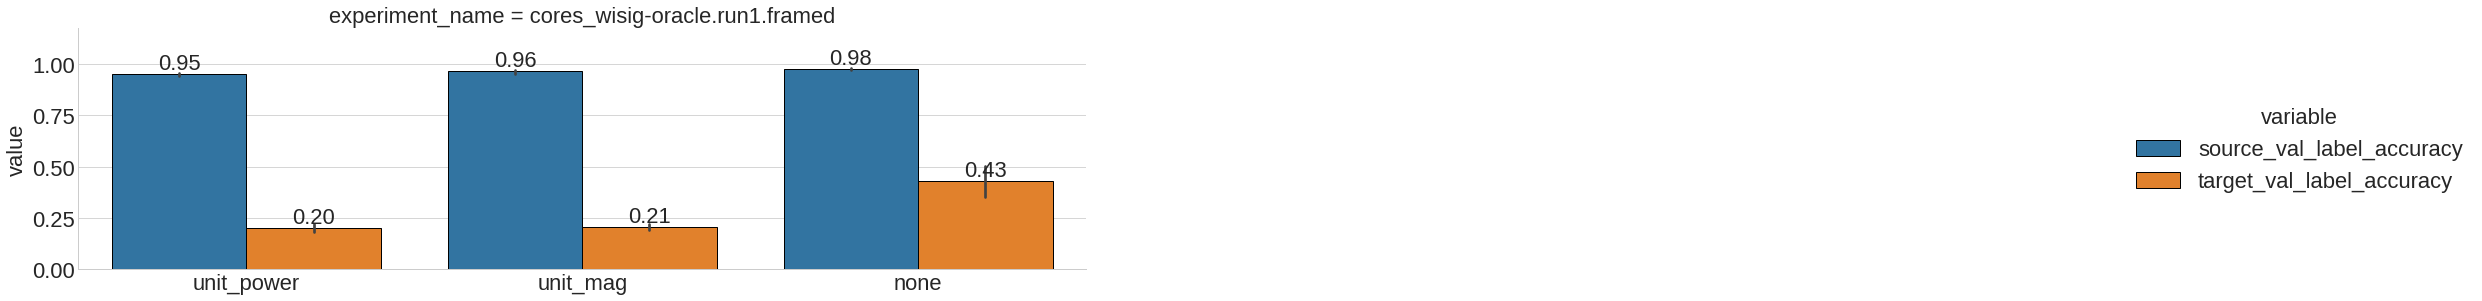

<Figure size 1080x3600 with 0 Axes>

In [5]:
matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

fg = sb.catplot(x='x_transform', col="experiment_name", y='value', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

# iterate through axes
for ax in fg.axes.ravel():
    
    ax.tick_params(labelbottom=True)
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)



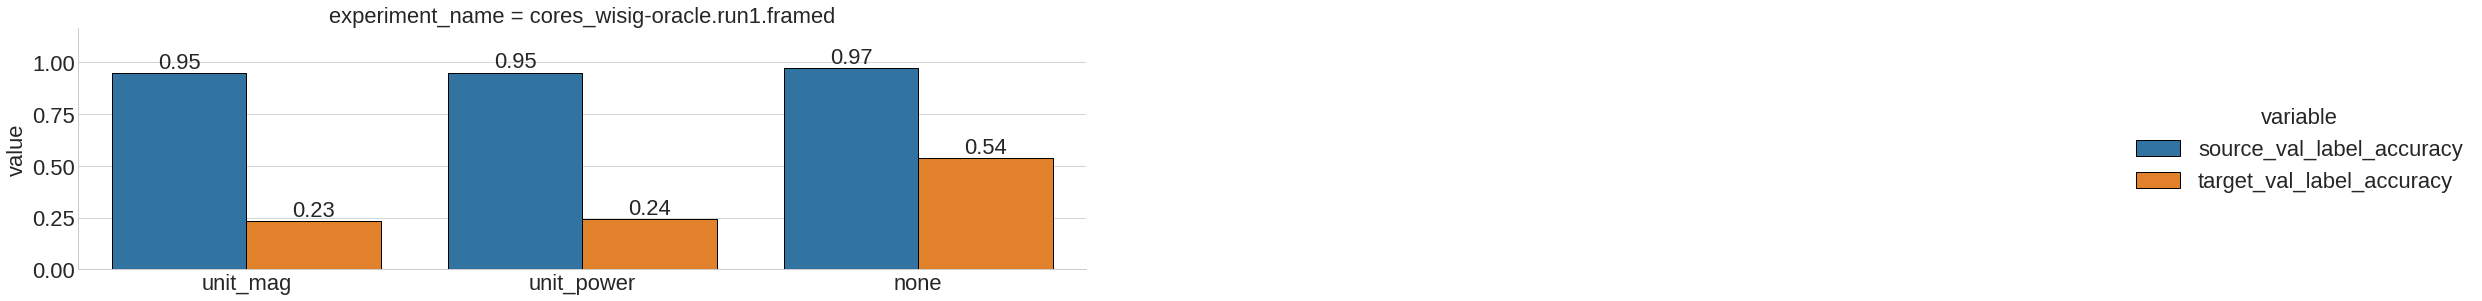

<Figure size 1080x3600 with 0 Axes>

In [6]:
# Pick the best trials based on target (on a per experiment+x_transform basis)
idx = all_trials.groupby(["experiment_name", "x_transform"])["target_val_label_accuracy"].transform(max) == all_trials["target_val_label_accuracy"]
all_trials = all_trials[idx]

m = pd.melt(all_trials, 
        id_vars=["experiment_name", "x_transform"], 
        value_vars=[
            "source_val_label_accuracy",
            "target_val_label_accuracy",
        ])

matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

fg = sb.catplot(x='x_transform', col="experiment_name", y='value', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

# iterate through axes
for ax in fg.axes.ravel():
    
    ax.tick_params(labelbottom=True)
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
